In [2]:
import numpy as np
import struct
import matplotlib.pylab as plt

In [3]:

def get_size(f):
    return struct.unpack('1L', bytearray(f.read(8)))[0]
def get_array(f,n):
    return struct.unpack(f'{n}d', bytearray(f.read(8*n)))
def read_field(filename):
        with open(filename, mode='rb') as f: # b is important -> binary
            nx=get_size(f)
            ny=get_size(f)
            phi=np.array(get_array(f,(nx+2)*(ny+2)) ).reshape((nx+2,ny+2))[1:nx+1,1:ny+1]
            mesh=generate_mesh(nx,ny)
        return mesh,phi
def generate_mesh(nx,ny):
    x=-1 + np.arange(0,nx)*2/nx
    y=-1 + np.arange(0,ny)*2/ny
    X,Y=np.meshgrid(x,y)
    return X.transpose(),Y.transpose()
def lap(alpha,r):
    return np.exp(-alpha*r**2)*(-4*alpha)*(1 - alpha*r**2)

In [5]:
(X,Y),phi=read_field("../phi.dat")

In [6]:
r=np.sqrt(X**2 + Y**2)
phi_exp=np.exp(-(X**2+ Y**2)*10)
rho_exp=lap(10,r)

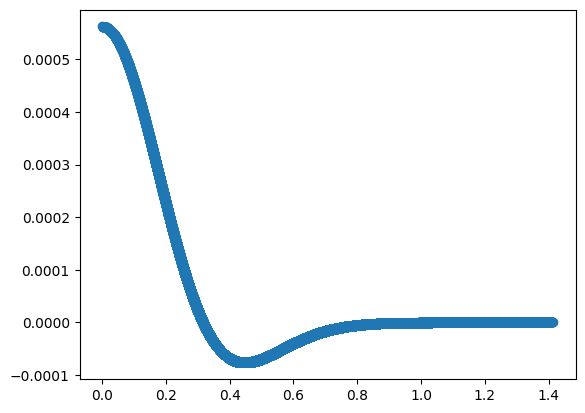

In [8]:
plt.plot( r.flatten(),phi.flatten(),"o")
#plt.plot( r.flatten(),(phi_exp.flatten() + phi.flatten()[-1] ),"go")

In [80]:
X.

(10, 8)